In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter
%matplotlib inline
import seaborn as sns

dataset can be downloaded from this link 
"https://www.kaggle.com/akhilv11/border-crossing-entry-data/download"

In [261]:
data=pd.read_csv("Border_Crossing_Entry_Data.csv")

In [262]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [263]:
print("US-Mexico has {} ports".format(len(data[data["Border"]=="US-Mexico Border"]["Port Name"].unique())))
print("US-Canada has {} ports".format(len(data[data["Border"]=="US-Canada Border"]["Port Name"].unique())))

US-Mexico has 27 ports
US-Canada has 89 ports


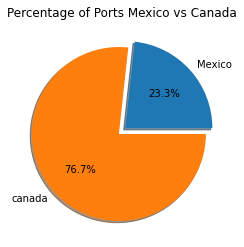

In [264]:
plt.pie(x=[27,89],labels={"Mexico","canada"},autopct='%1.1f%%',explode=[0.05,0.05],shadow=True);
plt.title("Percentage of Ports Mexico vs Canada");

In [265]:
from dateutil.parser import parse
data["Date"]=data["Date"].apply(lambda x: parse(x).year)

In [266]:
df=data.groupby(["Date","Border","Measure"])["Value"].sum().unstack()

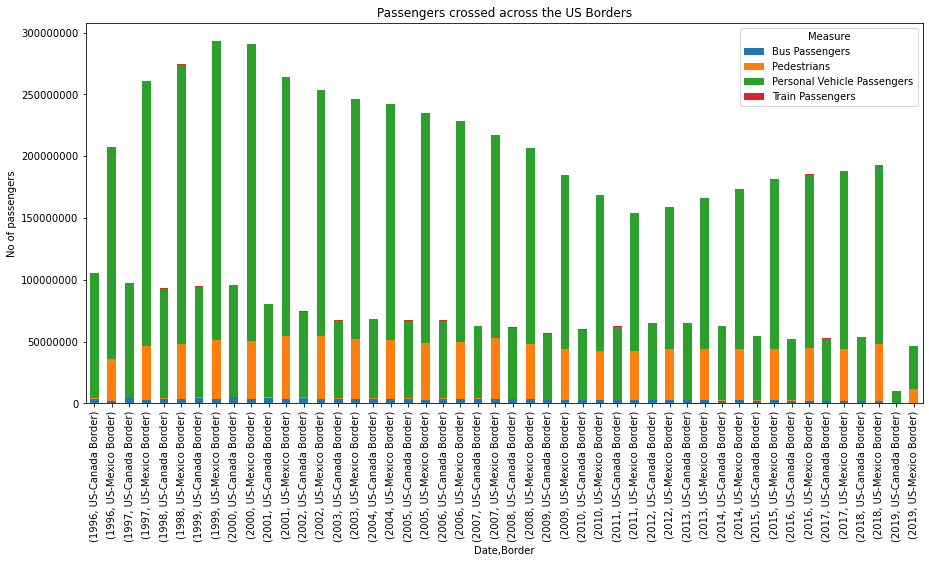

In [267]:
col=['Bus Passengers','Pedestrians','Personal Vehicle Passengers','Train Passengers']
df[col].plot(kind="bar",stacked=True,figsize=(15,7))
plt.title("Passengers crossed across the US Borders");
plt.ylabel("No of passengers")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

from above graph its evident that passengers travelled through Personal vechicles are way more compared to all other mode of transportation.
also in the year 1997 to 2001 more passengers crossed the border than any other years 

In [268]:
df=df[col].reset_index()

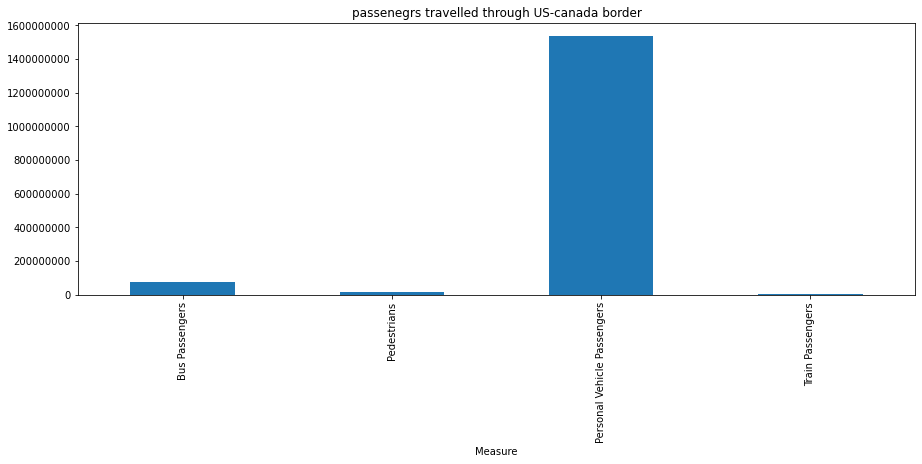

In [269]:
df.loc[df["Border"]=="US-Canada Border",col].sum().plot(kind="bar",figsize=(15,5))
plt.title("passenegrs travelled through US-canada border");
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

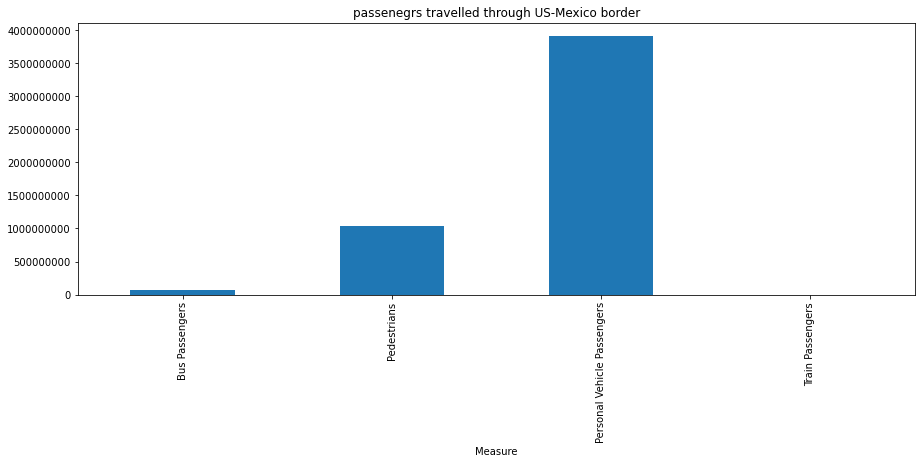

In [270]:
df.loc[df["Border"]=="US-Mexico Border",col].sum().plot(kind="bar",figsize=(15,5));
plt.title("passenegrs travelled through US-Mexico border");
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

In [271]:
states=set(list(data["State"].values))
new={}
for i in states:
    new[i]=len(data[data["State"]==i]["Port Name"].unique())

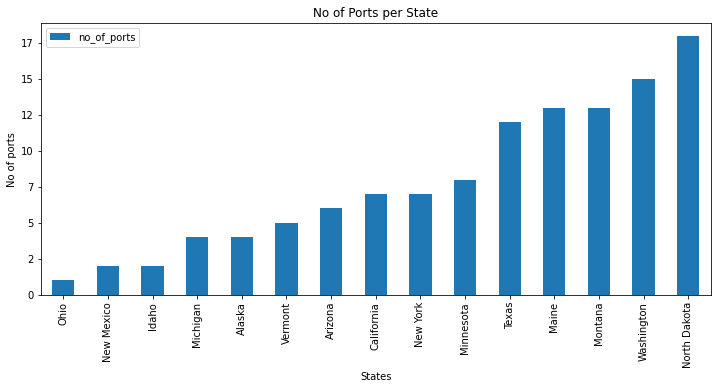

In [272]:
pd.DataFrame(new.values(),new.keys(),columns={"no_of_ports"}).sort_values(by="no_of_ports").plot(kind="bar",figsize=(12,5))
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.xlabel("States")
plt.ylabel("No of ports")
plt.title("No of Ports per State");

North Docota State has Max number of Ports,
so lets see in which port passengers travelled more.

In [273]:
df2=data[data.Measure.str.contains('Bus Passengers|Pedestrians|Personal Vehicle Passengers|Train Passengers')]
df2=data.groupby(["State","Measure"])["Value"].sum().unstack()

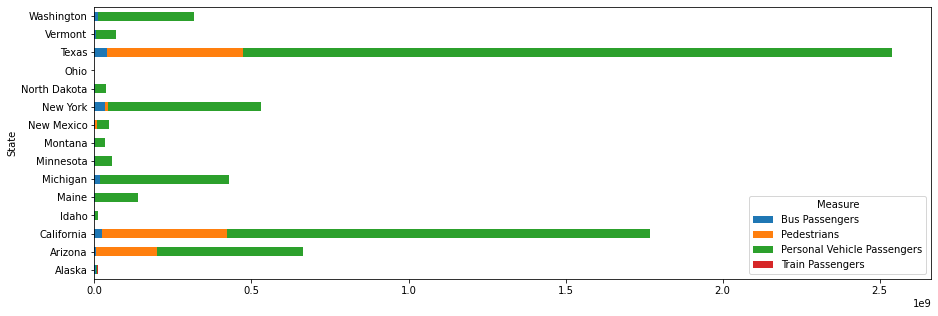

In [274]:
df2[col].plot(kind="barh",figsize=(15,5),stacked=True);

Despite North docta having highest ports,passengers crossed through "Texas" is the highest,followed by california and new york

### Total no of people travelled across all the mode

In [275]:
print("Total No of Passengers crossed acorss both the borders are {:,}".
      format(data[data.Measure.str.contains('Bus Passengers|Pedestrians|Personal Vehicle Passengers|Train Passengers')]["Value"].sum()))

Total No of Passengers crossed acorss both the borders are 6,650,137,710
